<a href="https://colab.research.google.com/github/geworgia/ML_challenge/blob/main/d4-spamEmail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Source: Almeida, T. & Hidalgo, J. (2011). SMS Spam Collection [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5CC84.

Initial format: file

The SMS Spam Collection is a publicly available dataset designed for mobile phone spam research, comprising 5,574 labeled SMS messages. This multivariate text dataset is primarily used for tasks like classification and clustering in the field of computer science. The corpus is compiled from two main sources: 425 spam messages extracted from the Grumbletext website, a UK forum where users report SMS spam, and 3,375 legitimate (ham) messages randomly selected from the NUS SMS Corpus, which contains around 10,000 messages collected from volunteers in Singapore. The dataset is stored in a single text file, where each line contains a class label ("ham" or "spam") followed by the raw message. The messages are not sorted chronologically, and the collection process involved significant manual effort, particularly in identifying spam messages from user claims. This dataset serves as a valuable resource for developing and testing spam detection algorithms.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd

file_path = '/content/SMSSpam'
df = pd.read_csv(file_path, header=None, sep='\t', names=['label', 'message'])
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


so for label only have two ("ham and spam").

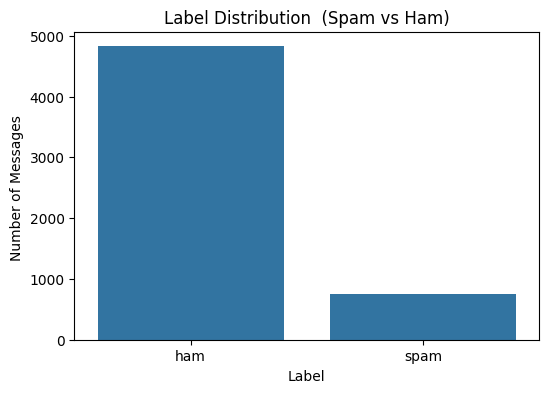

In [13]:
df['label'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label')
plt.title('Label Distribution  (Spam vs Ham)')
plt.xlabel('Label')
plt.ylabel('Number of Messages ')
plt.show()


Message Length Statistics:
count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64


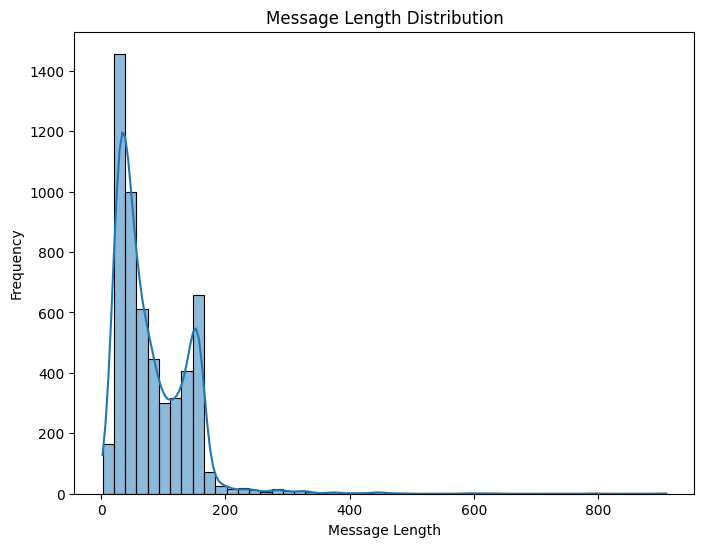

In [16]:
df['message_length'] = df['message'].apply(len)
print("\nMessage Length Statistics:")
print(df['message_length'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(df['message_length'], bins=50, kde=True)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

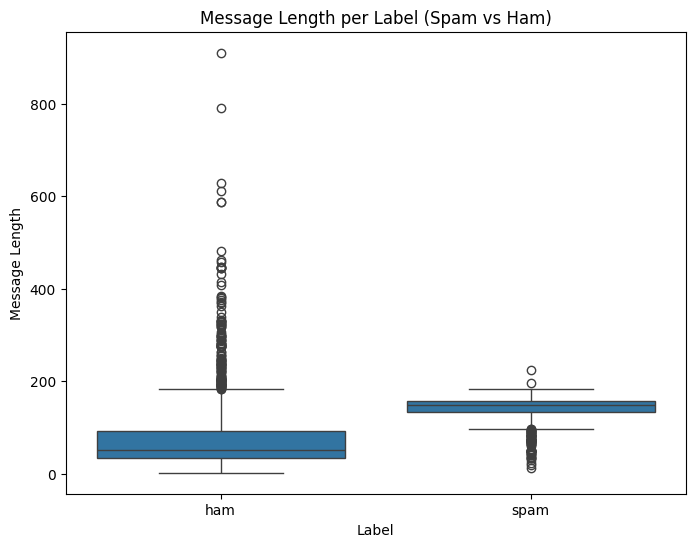

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='label', y='message_length')
plt.title('Message Length per Label (Spam vs Ham)')
plt.xlabel('Label')
plt.ylabel('Message Length')
plt.show()

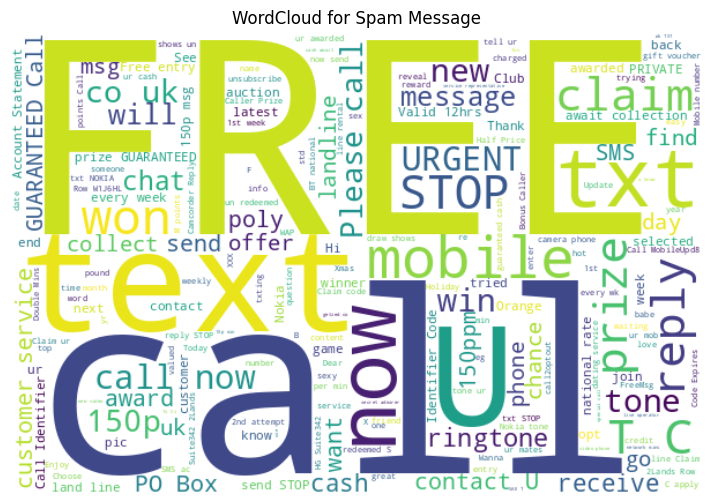

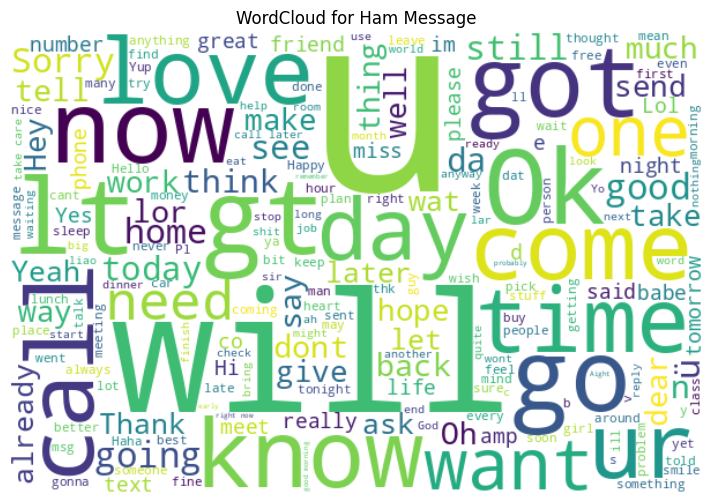

In [19]:
from wordcloud import WordCloud

spam_messages = df[df['label'] == 'spam']['message']
spam_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(' '.join(spam_messages))

plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Spam Message')
plt.axis('off')
plt.show()

ham_messages = df[df['label'] == 'ham']['message']
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(' '.join(ham_messages))

plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Ham Message')
plt.axis('off')
plt.show()


Correlation of Message Length with Label:
                message_length  label_numeric
message_length        1.000000       0.381937
label_numeric         0.381937       1.000000


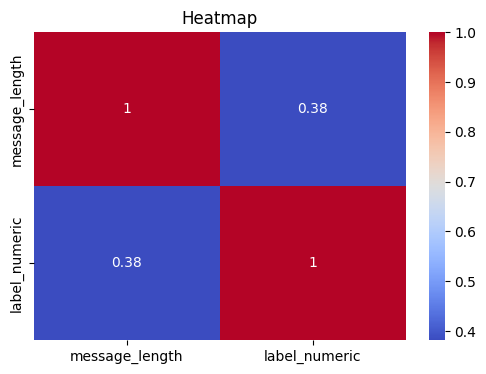

In [22]:
df['label_numeric'] = df['label'].map({'ham': 0, 'spam': 1})
print("\nCorrelation of Message Length with Label:")
print(df[['message_length', 'label_numeric']].corr())

plt.figure(figsize=(6, 4))
sns.heatmap(df[['message_length', 'label_numeric']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

## preprocessing

In [23]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X = df['message']
y = df['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## modelling

In [27]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nMatrix COnf:')
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.9919

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115


Matrix COnf:
[[966   0]
 [  9 140]]
